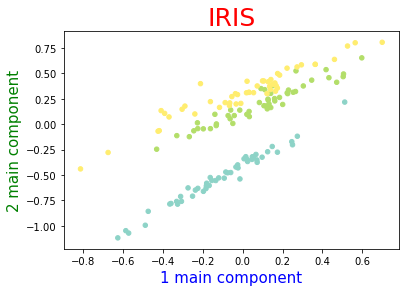

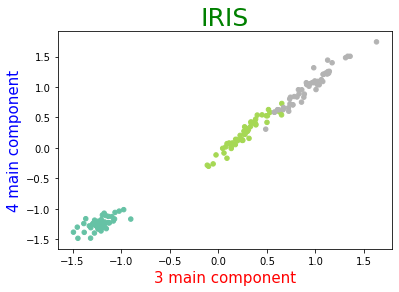

----------------------------------------------------------------------------


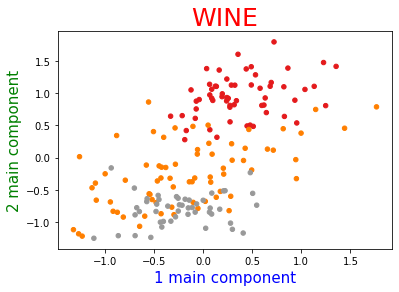

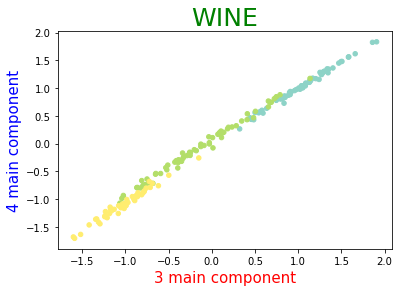

In [24]:
import numpy as np
import pandas as pd
import random
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
def Min(mas):
    min_val=mas[0]
    for i in range(len(mas)):
        if(min_val>mas[i]):
            min_val=mas[i]
    return min_val

def Max(mas):
    max_val=mas[0]
    for i in range(len(mas)):
        if(max_val<mas[i]):
            max_val=mas[i]
    return max_val

def HyperCube(mas):
    vec_max=list()
    vec_min=list()
    for i in range(len(mas[0])):
        l=list()
        for j in range(len(mas)):
            l.append(mas[j][i])
        vec_max.append(Max(l))
        vec_min.append(Min(l))
        
    for i in range(len(mas[0])):
        for j in range(len(mas)):
            mas[j][i]=2*((mas[j][i]-vec_min[i])/(vec_max[i]-vec_min[i]))-1
    return mas

def Aver(mas):
    x=[0 for i in range(len(mas[0]))]
    for i in range(len(mas[0])):
        count=0
        for j in range(len(mas)):
            x[i]+=mas[j][i]
            count+=1
        x[i]/=count
    return x

def Center(mas,x):
    for i in range(len(mas[0])):
        for j in range(len(mas)):
            mas[j][i]-=x[i]
    return mas
def Norm(x):
    _sum=0
    for i in range(len(x)):
        _sum+=x[i]**2
    _sum=_sum**(1/2)
    for i in range(len(x)):
        x[i]/=_sum
    return x

def Scal(a,b):
    scal=0
    for i in range(len(a)):
        scal+=a[i]*b[i]
    return scal

def sub(a,b):
    x=[0. for i in range(len(a))]
    for i in range(len(x)):
        x[i]=a[i]-b[i]
    return x

def mulNum(a,b):
    x=[0. for i in range(len(b))]
    for i in range(len(x)):
        x[i]= a*b[i]
    return x
def dev(a,b):
    x=[0. for i in range(len(a))]
    for i in range(len(x)):
        x[i]=a[i]/b
    return x
def S(a,b):
    x=[0. for i in range(len(a))]
    for i in range(len(x)):
        x[i]=a[i]+b[i]
    return x
def rec(a,b):
    x=[[0. for i in range(len(a[0]))]for j in range(len(a))]
    x=np.array(x)
    for k in range(len(a[0])):
        z=[[0. for i in range(len(a[0]))]for j in range(len(a))]
        z=np.array(z)
        for i in range(len(a)):
            z[i]=mulNum(a[i,k],b[k])
        for i in range(len(a)):
            for j in range(len(a[0])):
                x[i,j]+=z[i,j]
    return x
def Oj(x):
    Y=[[0.for i in range(len(x[0]))]for j in range(len(x))]
    w=[[0.for i in range(len(x[0]))]for j in range(len(x[0]))]
    Y=np.array(Y)
    w=np.array(w)
    for i in range(len(w)):
        w[0,i]=random.uniform(-1,1)
    for i in range(len(Y)):
        Y[i,0]=Scal(w[0],x[i])
    for k in range(len(x[0])-1):
        W=[[0. for i in range(len(x[0]))]for j in range(len(x))]
        for z in range(100):
            W[0]=Norm(w[k])
            for i in range(1,len(W)):
                W[i]= S(W[i-1],mulNum(Y[i-1,k],dev(sub(x[i-1],mulNum(Y[i-1,k],W[i-1])),i)))
                Norm(W[i])
            w[k+1]=W[len(W)-1]
        for i in range(len(Y)):
            Y[i,k+1]=Scal(w[k+1],x[i])
#     print('Восстановленные данные:\n',rec(Y,w))
#     print('Матрица главных компонент:\n',Y)
    return Y
data=datasets.load_iris()
x=data.data
HyperCube(x)
averData=Aver(x)
Center(x,averData)
col=data.target
Y=Oj(x)

ax = plt.subplot(111)
plt.scatter(Y[:,0],Y[:,1],c=col,s=20,cmap='Set3')
ax.set_title('IRIS',fontsize=25,color="red")
ax.set_xlabel("1 main component", color="blue",fontsize=15)
ax.set_ylabel('2 main component',color="green",fontsize=15)
plt.show()
ax = plt.subplot(111)
plt.scatter(Y[:,2],Y[:,3],c=col,s=20,cmap='Set2')
ax.set_title('IRIS',fontsize=25,color="green")
ax.set_xlabel("3 main component", color="red",fontsize=15)
ax.set_ylabel('4 main component',color="blue",fontsize=15)
plt.show()


wine=datasets.load_wine()
col_wine=wine.target
wine=wine.data
HyperCube(wine)
averData=Aver(wine)
Center(wine,averData)

X=Oj(wine)
print('----------------------------------------------------------------------------')
ax = plt.subplot(111)
plt.scatter(X[:,0],X[:,1],c=col_wine,s=20,cmap='Set1')
ax.set_title('WINE',fontsize=25,color="red")
ax.set_xlabel("1 main component", color="blue",fontsize=15)
ax.set_ylabel('2 main component',color="green",fontsize=15)
plt.show()

ax = plt.subplot(111)
plt.scatter(X[:,2],X[:,3],c=col_wine,s=20,cmap='Set3')
ax.set_title('WINE',fontsize=25,color="green")
ax.set_xlabel("3 main component", color="red",fontsize=15)
ax.set_ylabel('4 main component',color="blue",fontsize=15)
plt.show()